In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [93]:
dataset = pd.read_csv('network_backup_dataset.csv')

In [94]:
dataset_revised = dataset.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

In [95]:
X = dataset_revised.iloc[:,[0,1,2,3,4]].values
y = dataset_revised.iloc[:,5].values

In [96]:
#initializing X and y for linear regression
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []

y0 = []
y1 = []
y2 = []
y3 = []
y4 = []

for i in range(len(X)):
    if X[i][3] == 0:
        X0.append(X[i])
        y0.append(y[i])
    if X[i][3] == 1:
        X1.append(X[i])
        y1.append(y[i])
    if X[i][3] == 2:
        X2.append(X[i])
        y2.append(y[i])
    if X[i][3] == 3:
        X3.append(X[i])
        y3.append(y[i])
    if X[i][3] == 4:
        X4.append(X[i])
        y4.append(y[i])

In [97]:
#convert everything to a numpy array

y0 = np.array(y0)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)

X0 = np.array(X0)
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X4 = np.array(X4)


### 2D Part i

In [98]:
def calculate_RMSE(predicted, actual):  
    return np.sqrt(np.mean((predicted - actual) ** 2))  

Workflow 0 train RMSE: 0.035835520779861095
Workflow 0 test RMSE: 0.035886970248931206


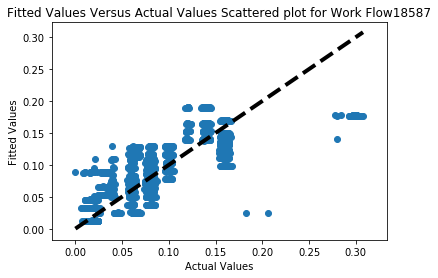

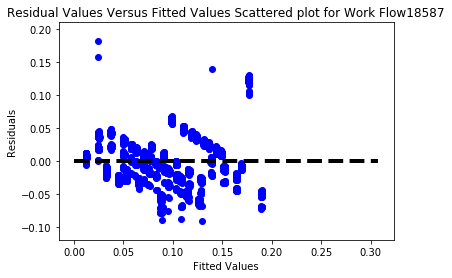

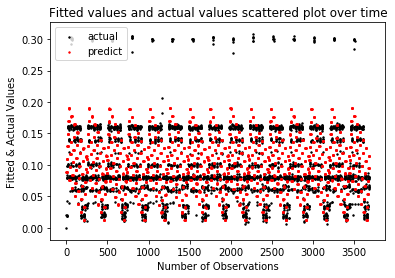

In [99]:
#Workflow 0
linear_regression = LinearRegression()
kf = KFold(n_splits=10)
train_rmse = 0
test_rmse = 0
for trainset_index, testset_index in kf.split(X0):
    X_train, X_test = X0[trainset_index], X0[testset_index]
    y_train, y_test = y0[trainset_index], y0[testset_index]
    linear_model = linear_regression.fit(X_train, y_train)
    y_test_pred = linear_model.predict(X_test)
    y_train_pred = linear_model.predict(X_train)
    train_rmse += mean_squared_error(y_train, y_train_pred)
    test_rmse += mean_squared_error(y_test, y_test_pred)
    avg_train_rmse = math.sqrt(train_rmse/10.0)
    avg_test_rmse = math.sqrt(test_rmse/10.0)
print('Workflow 0 train RMSE:', avg_train_rmse)
print('Workflow 0 test RMSE:', avg_test_rmse)

y0_pred = cross_val_predict(linear_regression, X0, y0, cv=10)
plt.title('Fitted Values Versus Actual Values Scattered plot for Work Flow' + str(i))
plt.scatter(y0, y0_pred)
plt.plot([y0.min(), y0.max()], [y0.min(), y0.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Work Flow' + str(i))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y0_pred,y0-y0_pred,  color='blue', lw=1, label='residual')
plt.plot([y0.min(), y0.max()], [0, 0], 'k--', lw=4)
plt.show()

plt.figure()
# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y0.shape[0]), y0, color='black', label='actual', s=2)
plt.scatter(np.arange(y0.shape[0]), y0_pred, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

Workflow 1 train RMSE: 0.14876603056260168
Workflow 1 test RMSE: 0.14891860201393806


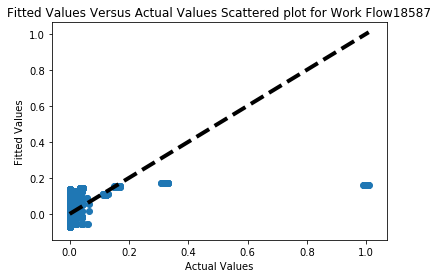

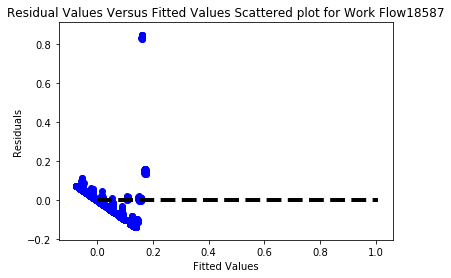

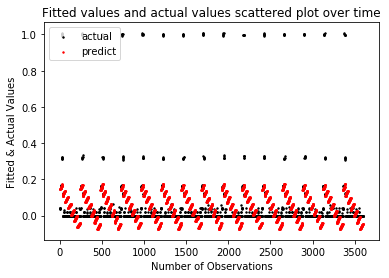

In [100]:
#Workflow 1
linear_regression = LinearRegression()
kf = KFold(n_splits=10)
train_rmse = 0
test_rmse = 0
for trainset_index, testset_index in kf.split(X1):
    X_train, X_test = X1[trainset_index], X1[testset_index]
    y_train, y_test = y1[trainset_index], y1[testset_index]
    linear_model = linear_regression.fit(X_train, y_train)
    y_test_pred = linear_model.predict(X_test)
    y_train_pred = linear_model.predict(X_train)
    train_rmse += mean_squared_error(y_train, y_train_pred)
    test_rmse += mean_squared_error(y_test, y_test_pred)
    avg_train_rmse = math.sqrt(train_rmse/10.0)
    avg_test_rmse = math.sqrt(test_rmse/10.0)
print('Workflow 1 train RMSE:', avg_train_rmse)
print('Workflow 1 test RMSE:', avg_test_rmse)

y1_pred = cross_val_predict(linear_regression, X1, y1, cv=10)
plt.title('Fitted Values Versus Actual Values Scattered plot for Work Flow' + str(i))
plt.scatter(y1, y1_pred)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Work Flow' + str(i))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y1_pred,y1-y1_pred,  color='blue', lw=1, label='residual')
plt.plot([y1.min(), y1.max()], [0, 0], 'k--', lw=4)
plt.show()

plt.figure()
# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y1.shape[0]), y1, color='black', label='actual', s=2)
plt.scatter(np.arange(y1.shape[0]), y1_pred, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

Workflow 2 train RMSE: 0.04290932063907724
Workflow 2 test RMSE: 0.0430669058478793


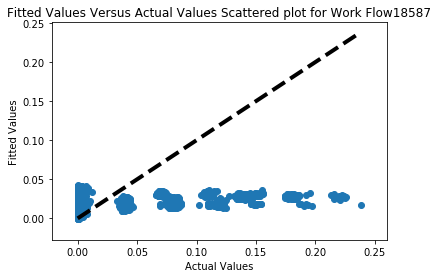

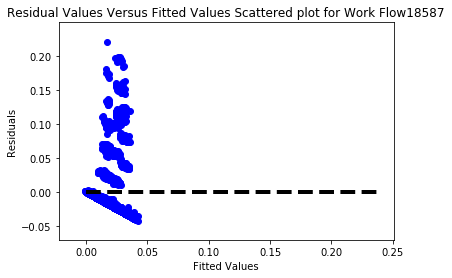

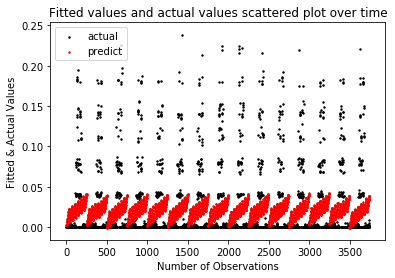

In [101]:
#Workflow 2
linear_regression = LinearRegression()
kf = KFold(n_splits=10)
train_rmse = 0
test_rmse = 0
for trainset_index, testset_index in kf.split(X2):
    X_train, X_test = X2[trainset_index], X2[testset_index]
    y_train, y_test = y2[trainset_index], y2[testset_index]
    linear_model = linear_regression.fit(X_train, y_train)
    y_test_pred = linear_model.predict(X_test)
    y_train_pred = linear_model.predict(X_train)
    train_rmse += mean_squared_error(y_train, y_train_pred)
    test_rmse += mean_squared_error(y_test, y_test_pred)
    avg_train_rmse = math.sqrt(train_rmse/10.0)
    avg_test_rmse = math.sqrt(test_rmse/10.0)
print('Workflow 2 train RMSE:', avg_train_rmse)
print('Workflow 2 test RMSE:', avg_test_rmse)

y2_pred = cross_val_predict(linear_regression, X2, y2, cv=10)
plt.title('Fitted Values Versus Actual Values Scattered plot for Work Flow' + str(i))
plt.scatter(y2, y2_pred)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Work Flow' + str(i))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y2_pred,y2-y2_pred,  color='blue', lw=1, label='residual')
plt.plot([y2.min(), y2.max()], [0, 0], 'k--', lw=4)
plt.show()

plt.figure()
# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y2.shape[0]), y2, color='black', label='actual', s=2)
plt.scatter(np.arange(y2.shape[0]), y2_pred, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

Workflow 3 train RMSE: 0.007243878873882534
Workflow 3 test RMSE: 0.007260894242099694


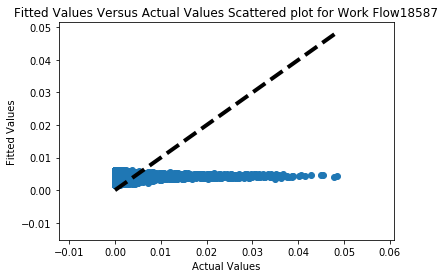

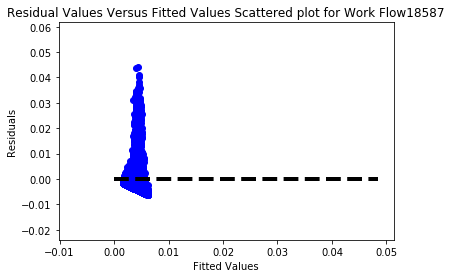

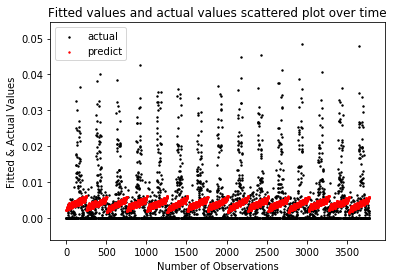

In [102]:
#Workflow 3
linear_regression = LinearRegression()
kf = KFold(n_splits=10)
train_rmse = 0
test_rmse = 0
for trainset_index, testset_index in kf.split(X3):
    X_train, X_test = X3[trainset_index], X3[testset_index]
    y_train, y_test = y3[trainset_index], y3[testset_index]
    linear_model = linear_regression.fit(X_train, y_train)
    y_test_pred = linear_model.predict(X_test)
    y_train_pred = linear_model.predict(X_train)
    train_rmse += mean_squared_error(y_train, y_train_pred)
    test_rmse += mean_squared_error(y_test, y_test_pred)
    avg_train_rmse = math.sqrt(train_rmse/10.0)
    avg_test_rmse = math.sqrt(test_rmse/10.0)
print('Workflow 3 train RMSE:', avg_train_rmse)
print('Workflow 3 test RMSE:', avg_test_rmse)

y3_pred = cross_val_predict(linear_regression, X3, y3, cv=10)
plt.title('Fitted Values Versus Actual Values Scattered plot for Work Flow' + str(i))
plt.scatter(y3, y3_pred)
plt.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Work Flow' + str(i))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y3_pred,y3-y3_pred,  color='blue', lw=1, label='residual')
plt.plot([y3.min(), y3.max()], [0, 0], 'k--', lw=4)
plt.show()

plt.figure()
# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y3.shape[0]), y3, color='black', label='actual', s=2)
plt.scatter(np.arange(y3.shape[0]), y3_pred, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

Workflow 4 train RMSE: 0.08592193679327194
Workflow 4 test RMSE: 0.08599061411565445


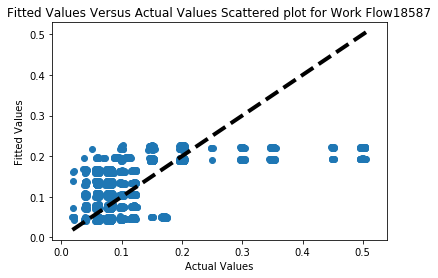

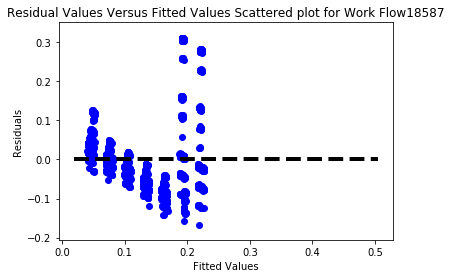

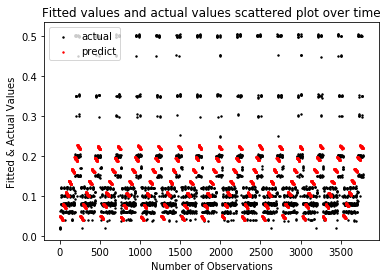

In [103]:
#Workflow 4
linear_regression = LinearRegression()
kf = KFold(n_splits=10)
train_rmse = 0
test_rmse = 0
for trainset_index, testset_index in kf.split(X4):
    X_train, X_test = X4[trainset_index], X4[testset_index]
    y_train, y_test = y4[trainset_index], y4[testset_index]
    linear_model = linear_regression.fit(X_train, y_train)
    y_test_pred = linear_model.predict(X_test)
    y_train_pred = linear_model.predict(X_train)
    train_rmse += mean_squared_error(y_train, y_train_pred)
    test_rmse += mean_squared_error(y_test, y_test_pred)
    avg_train_rmse = math.sqrt(train_rmse/10.0)
    avg_test_rmse = math.sqrt(test_rmse/10.0)
print('Workflow 4 train RMSE:', avg_train_rmse)
print('Workflow 4 test RMSE:', avg_test_rmse)

y4_pred = cross_val_predict(linear_regression, X4, y4, cv=10)
plt.title('Fitted Values Versus Actual Values Scattered plot for Work Flow' + str(i))
plt.scatter(y4, y4_pred)
plt.plot([y4.min(), y4.max()], [y4.min(), y4.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Work Flow' + str(i))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y4_pred,y4-y4_pred,  color='blue', lw=1, label='residual')
plt.plot([y4.min(), y4.max()], [0, 0], 'k--', lw=4)
plt.show()

plt.figure()
# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y4.shape[0]), y4, color='black', label='actual', s=2)
plt.scatter(np.arange(y4.shape[0]), y4_pred, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

### 2D Part ii

Workflow 0
At degree 1
At degree 2
At degree 3
At degree 4
At degree 5
At degree 6
At degree 7
At degree 8
At degree 9
At degree 10
The minimum test RMSE is: 0.011939288438011179 which is at index 7
The minimum train RMSE is: 0.0072705464648928075 which is at index 10


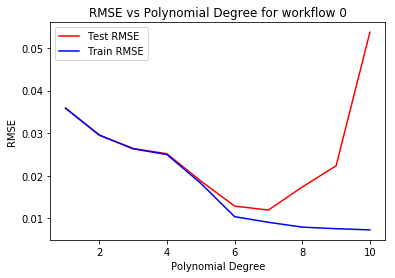

In [104]:
k_fold = KFold(n_splits=10)
linear_regression = LinearRegression()
polynomial_degree = range(1, 11)
k_fold = KFold(n_splits=10)

#workflow 0
print('Workflow 0')
avg_train_rmse = []
avg_test_rmse = []

for i in polynomial_degree:
    print('At degree', i)
    poly = PolynomialFeatures(i)
    poly_fit_X = poly.fit_transform(X0)
    
    train_rmse = 0
    test_rmse = 0
    
    for training_index, testing_index in k_fold.split(X0):
        X_train, X_test = poly_fit_X[training_index], poly_fit_X[testing_index]
        y_train, y_test = y0[training_index], y0[testing_index]
        
        linear_model_fitting = linear_regression.fit(X_train, y_train)
        y_test_predict = linear_model_fitting.predict(X_test)
        y_train_predict = linear_model_fitting.predict(X_train)
        
        train_rmse += mean_squared_error(y_train, y_train_predict)
        test_rmse += mean_squared_error(y_test, y_test_predict)
        
    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print('The minimum test RMSE is:', min(avg_test_rmse), 'which is at index', polynomial_degree[avg_test_rmse.index(min(avg_test_rmse))])
print('The minimum train RMSE is:', min(avg_train_rmse), 'which is at index', polynomial_degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Polynomial Degree for workflow 0')
plt.plot(polynomial_degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(polynomial_degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()



Workflow 1
At degree 1
At degree 2
At degree 3
At degree 4
At degree 5
At degree 6
At degree 7
At degree 8
At degree 9
At degree 10
The minimum test RMSE is: 0.014453063813442435 which is at index 9
The minimum train RMSE is: 0.005214142438427247 which is at index 10


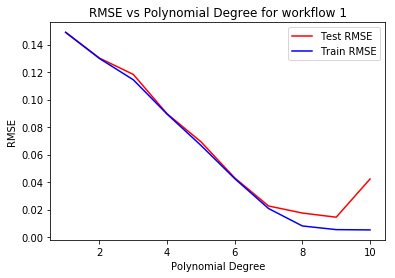

In [105]:
#workflow 1
print('Workflow 1')
avg_train_rmse = []
avg_test_rmse = []

for i in polynomial_degree:
    print('At degree', i)
    poly = PolynomialFeatures(i)
    poly_fit_X = poly.fit_transform(X1)
    
    train_rmse = 0
    test_rmse = 0
    string = '1'
    for training_index, testing_index in k_fold.split(X1):
        X_train, X_test = poly_fit_X[training_index], poly_fit_X[testing_index]
        y_train, y_test = y1[training_index], y1[testing_index]
        
        linear_model_fitting = linear_regression.fit(X_train, y_train)
        y_test_predict = linear_model_fitting.predict(X_test)
        y_train_predict = linear_model_fitting.predict(X_train)
        
        train_rmse += mean_squared_error(y_train, y_train_predict)
        test_rmse += mean_squared_error(y_test, y_test_predict)
        
    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print('The minimum test RMSE is:', min(avg_test_rmse), 'which is at index', polynomial_degree[avg_test_rmse.index(min(avg_test_rmse))])
print('The minimum train RMSE is:', min(avg_train_rmse), 'which is at index', polynomial_degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Polynomial Degree for workflow 1')
plt.plot(polynomial_degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(polynomial_degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Workflow 2
At degree 1
At degree 2
At degree 3
At degree 4
At degree 5
At degree 6
At degree 7
At degree 8
At degree 9
At degree 10
The minimum test RMSE is: 0.025649758426892665 which is at index 6
The minimum train RMSE is: 0.017452191833953756 which is at index 10


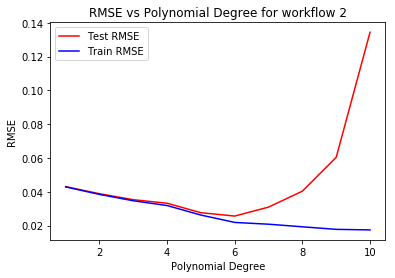

In [106]:
#workflow 2
print('Workflow 2')
avg_train_rmse = []
avg_test_rmse = []

for i in polynomial_degree:
    print('At degree', i)
    poly = PolynomialFeatures(i)
    poly_fit_X = poly.fit_transform(X2)
    
    train_rmse = 0
    test_rmse = 0
    
    for training_index, testing_index in k_fold.split(X2):
        X_train, X_test = poly_fit_X[training_index], poly_fit_X[testing_index]
        y_train, y_test = y2[training_index], y2[testing_index]
        
        linear_model_fitting = linear_regression.fit(X_train, y_train)
        y_test_predict = linear_model_fitting.predict(X_test)
        y_train_predict = linear_model_fitting.predict(X_train)
        
        train_rmse += mean_squared_error(y_train, y_train_predict)
        test_rmse += mean_squared_error(y_test, y_test_predict)
        
    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print('The minimum test RMSE is:', min(avg_test_rmse), 'which is at index', polynomial_degree[avg_test_rmse.index(min(avg_test_rmse))])
print('The minimum train RMSE is:', min(avg_train_rmse), 'which is at index', polynomial_degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Polynomial Degree for workflow 2')
plt.plot(polynomial_degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(polynomial_degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Workflow 3
At degree 1
At degree 2
At degree 3
At degree 4
At degree 5
At degree 6
At degree 7
At degree 8
At degree 9
At degree 10
The minimum test RMSE is: 0.005068054047960915 which is at index 5
The minimum train RMSE is: 0.004238908268848313 which is at index 8


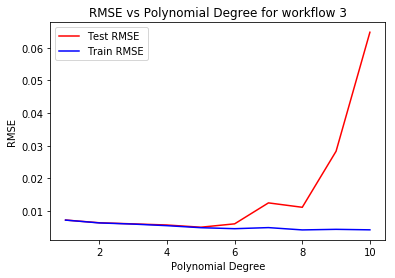

In [107]:
#workflow 3
print('Workflow 3')
avg_train_rmse = []
avg_test_rmse = []

for i in polynomial_degree:
    print('At degree', i)
    poly = PolynomialFeatures(i)
    poly_fit_X = poly.fit_transform(X3)
    
    train_rmse = 0
    test_rmse = 0
    
    for training_index, testing_index in k_fold.split(X3):
        X_train, X_test = poly_fit_X[training_index], poly_fit_X[testing_index]
        y_train, y_test = y3[training_index], y3[testing_index]
        
        linear_model_fitting = linear_regression.fit(X_train, y_train)
        y_test_predict = linear_model_fitting.predict(X_test)
        y_train_predict = linear_model_fitting.predict(X_train)
        
        train_rmse += mean_squared_error(y_train, y_train_predict)
        test_rmse += mean_squared_error(y_test, y_test_predict)
        
    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print('The minimum test RMSE is:', min(avg_test_rmse), 'which is at index', polynomial_degree[avg_test_rmse.index(min(avg_test_rmse))])
print('The minimum train RMSE is:', min(avg_train_rmse), 'which is at index', polynomial_degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Polynomial Degree for workflow 3')
plt.plot(polynomial_degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(polynomial_degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Workflow 4
At degree 1
At degree 2
At degree 3
At degree 4
At degree 5
At degree 6
At degree 7
At degree 8
At degree 9
At degree 10
The minimum test RMSE is: 0.051122430841032664 which is at index 5
The minimum train RMSE is: 0.01553391774557794 which is at index 10


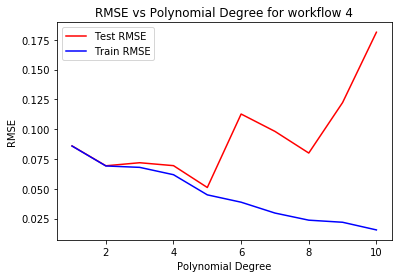

In [108]:
#workflow 4
print('Workflow 4')
avg_train_rmse = []
avg_test_rmse = []

for i in polynomial_degree:
    print('At degree', i)
    poly = PolynomialFeatures(i)
    poly_fit_X = poly.fit_transform(X4)
    
    train_rmse = 0
    test_rmse = 0
    
    for training_index, testing_index in k_fold.split(X4):
        X_train, X_test = poly_fit_X[training_index], poly_fit_X[testing_index]
        y_train, y_test = y4[training_index], y4[testing_index]
        
        linear_model_fitting = linear_regression.fit(X_train, y_train)
        y_test_predict = linear_model_fitting.predict(X_test)
        y_train_predict = linear_model_fitting.predict(X_train)
        
        train_rmse += mean_squared_error(y_train, y_train_predict)
        test_rmse += mean_squared_error(y_test, y_test_predict)
        
    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print('The minimum test RMSE is:', min(avg_test_rmse), 'which is at index', polynomial_degree[avg_test_rmse.index(min(avg_test_rmse))])
print('The minimum train RMSE is:', min(avg_train_rmse), 'which is at index', polynomial_degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Polynomial Degree for workflow 4')
plt.plot(polynomial_degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(polynomial_degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

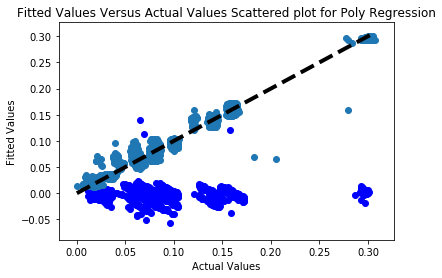

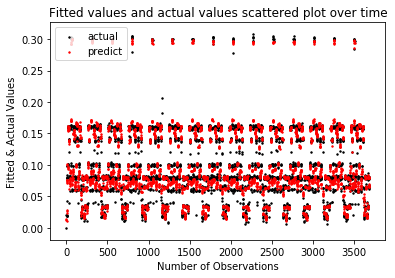

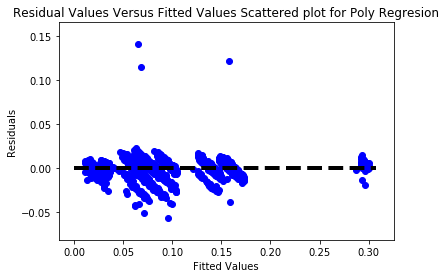

In [110]:
#workflow 0 - min RMSE at poolynomial degree 7

poly = poly = PolynomialFeatures(7)
X0_poly = poly.fit_transform(X0)

linear_model_fitting = linear_regression.fit(X0_poly, y0)
y0_predicted = linear_model_fitting.predict(X0_poly)

plt.title('Fitted Values Versus Actual Values Scattered plot for Poly Regression')
plt.scatter(y0, y0_predicted)
plt.plot([y0.min(), y0.max()], [y0.min(), y0.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y0.shape[0]), y0, color='black', label='actual', s=2)
plt.scatter(np.arange(y0.shape[0]), y0_predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Poly Regresion')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y0_predicted,y0-y0_predicted,  color='blue', lw=1, label='residual')
plt.plot([y0.min(), y0.max()], [0, 0], 'k--', lw=4)
plt.show()



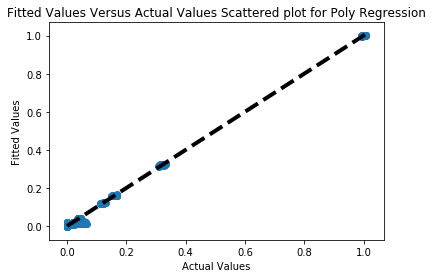

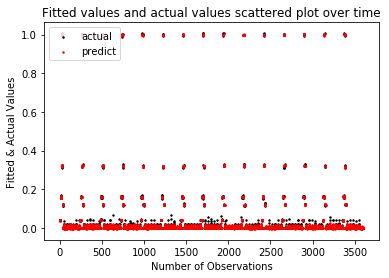

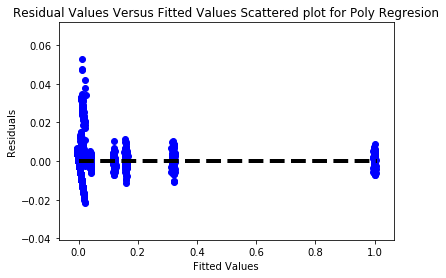

In [111]:
#workflow 1 - min RMSE at polynomial degree 9

poly = poly = PolynomialFeatures(9)
X1_poly = poly.fit_transform(X1)

linear_model_fitting = linear_regression.fit(X1_poly, y1)
y1_predicted = linear_model_fitting.predict(X1_poly)

plt.title('Fitted Values Versus Actual Values Scattered plot for Poly Regression')
plt.scatter(y1, y1_predicted)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y1.shape[0]), y1, color='black', label='actual', s=2)
plt.scatter(np.arange(y1.shape[0]), y1_predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Poly Regresion')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y1_predicted,y1-y1_predicted,  color='blue', lw=1, label='residual')
plt.plot([y1.min(), y1.max()], [0, 0], 'k--', lw=4)
plt.show()

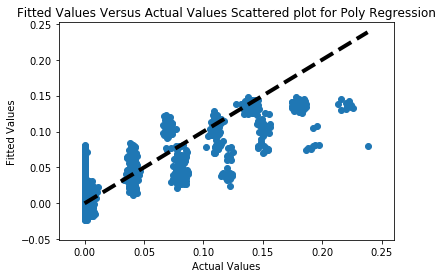

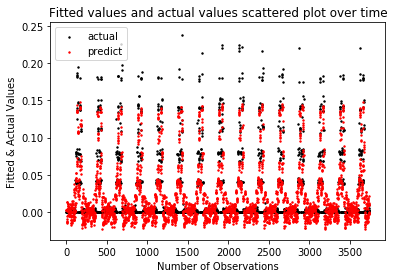

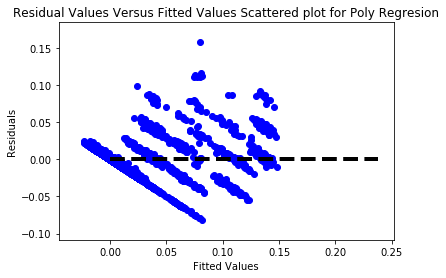

In [112]:
#workflow 2 - min RMSE at polynomial degree 6

poly = poly = PolynomialFeatures(6)
X2_poly = poly.fit_transform(X2)

linear_model_fitting = linear_regression.fit(X2_poly, y2)
y2_predicted = linear_model_fitting.predict(X2_poly)

plt.title('Fitted Values Versus Actual Values Scattered plot for Poly Regression')
plt.scatter(y2, y2_predicted)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y2.shape[0]), y2, color='black', label='actual', s=2)
plt.scatter(np.arange(y2.shape[0]), y2_predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Poly Regresion')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y2_predicted,y2-y2_predicted,  color='blue', lw=1, label='residual')
plt.plot([y2.min(), y2.max()], [0, 0], 'k--', lw=4)
plt.show()

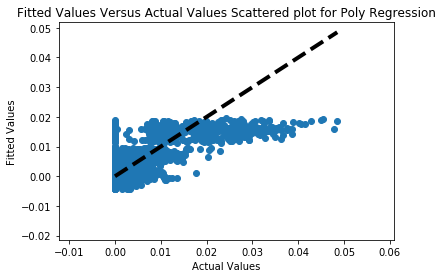

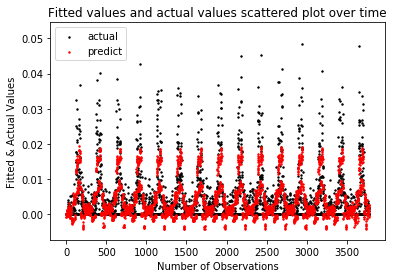

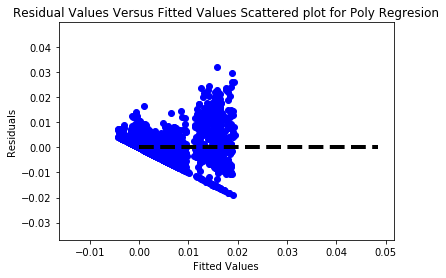

In [113]:
#workflow 3 - min RMSE at polynomial degree 5

poly = poly = PolynomialFeatures(5)
X3_poly = poly.fit_transform(X3)

linear_model_fitting = linear_regression.fit(X3_poly, y3)
y3_predicted = linear_model_fitting.predict(X3_poly)

plt.title('Fitted Values Versus Actual Values Scattered plot for Poly Regression')
plt.scatter(y3, y3_predicted)
plt.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y3.shape[0]), y3, color='black', label='actual', s=2)
plt.scatter(np.arange(y3.shape[0]), y3_predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Poly Regresion')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y3_predicted,y3-y3_predicted,  color='blue', lw=1, label='residual')
plt.plot([y3.min(), y3.max()], [0, 0], 'k--', lw=4)
plt.show()

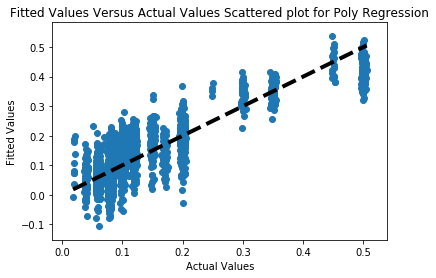

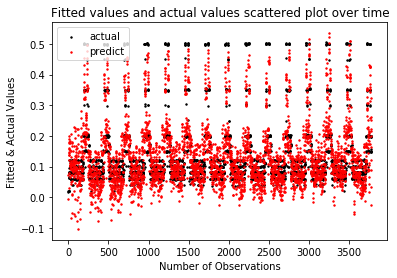

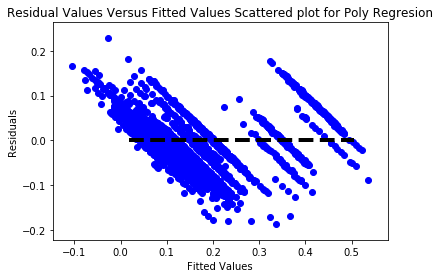

In [114]:
#workflow 4 - min RMSE at polynomial degree 5

poly = poly = PolynomialFeatures(5)
X4_poly = poly.fit_transform(X4)

linear_model_fitting = linear_regression.fit(X4_poly, y4)
y4_predicted = linear_model_fitting.predict(X4_poly)

plt.title('Fitted Values Versus Actual Values Scattered plot for Poly Regression')
plt.scatter(y4, y4_predicted)
plt.plot([y4.min(), y4.max()], [y4.min(), y4.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y4.shape[0]), y4, color='black', label='actual', s=2)
plt.scatter(np.arange(y4.shape[0]), y4_predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for Poly Regresion')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y4_predicted,y4-y4_predicted,  color='blue', lw=1, label='residual')
plt.plot([y4.min(), y4.max()], [0, 0], 'k--', lw=4)
plt.show()